# Nova seção

Aula 01 - Explore Dados com Pandas

In [ ]:
import pandas as pd #Importando Biblioteca Pandas.
df = pd.read_csv('https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv')
df.head(10)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [ ]:
df.info() #Mostrando informações da tabela.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [ ]:
df.describe() #Mostrando descrições dos elementos da tabela.

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [ ]:
df.shape #Mostra a quantidade de linhas e colunas.

(133349, 11)

In [ ]:
df_renomear_colunas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

df.rename(columns=df_renomear_colunas, inplace=True)
df.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')

In [ ]:
df.columns #Mostra os nomes das colunas da tabela.

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')

In [ ]:
df_renomear_colunas = { #Renomeando as Colunas.
    'ano': 'ano',
    'nivel_experiencia': 'senioridade',
    'tipo_emprego': 'contrato',
    'cargo': 'cargo',
    'salario': 'salario',
    'moeda_salario': 'moeda',
    'salario_em_usd': 'usd',
    'residencia_funcionario': 'residencia',
    'taxa_remoto': 'remoto',
    'localizacao_empresa': 'empresa',
    'tamanho_empresa': 'tamanho_empresa'
}

df.rename(columns=df_renomear_colunas, inplace=True)
df.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')

In [ ]:
df['senioridade'].value_counts() #Mostrando o que contem na coluna de SENIORIDADE.

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [ ]:
df['contrato'].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [ ]:
df['remoto'].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [ ]:
senioridade = { #Traduzindo as Siglas da Coluna SENIORIDADE para melhor entendimento.
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}

df['senioridade'] = df['senioridade'].replace(senioridade)
df['senioridade'].value_counts()

,count
senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [ ]:
contrato = {
    'FT': 'Tempo Integral',
    'PT': 'Tempo Parcial',
    'FL': 'Freelance',
    'CT': 'Contrato'
}

df['contrato'] = df['contrato'].replace(contrato)
df['contrato'].value_counts()

,count
contrato,
Tempo Integral,132563
Contrato,394
Tempo Parcial,376
Freelance,16


In [ ]:
tamanho_empresa = {
    'M': 'Médio',
    'L': 'Grande',
    'S': 'Pequeno'
}

df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)
df

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,100,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,100,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,0,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,0,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,0,US,Médio
...,...,...,...,...,...,...,...,...,...,...,...
133344,2020.0,Senior,Tempo Integral,Data Scientist,412000,USD,412000,US,100,US,Grande
133345,2021.0,Pleno,Tempo Integral,Principal Data Scientist,151000,USD,151000,US,100,US,Grande
133346,2020.0,Junior,Tempo Integral,Data Scientist,105000,USD,105000,US,100,US,Pequeno
133347,2020.0,Junior,Contrato,Business Data Analyst,100000,USD,100000,US,100,US,Grande


In [ ]:
remoto = {
    0: 'Presencial',
    50: 'Híbrido',
    100: 'Remoto'
}

df['remoto'] = df['remoto'].replace(remoto)
df

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio
...,...,...,...,...,...,...,...,...,...,...,...
133344,2020.0,Senior,Tempo Integral,Data Scientist,412000,USD,412000,US,Remoto,US,Grande
133345,2021.0,Pleno,Tempo Integral,Principal Data Scientist,151000,USD,151000,US,Remoto,US,Grande
133346,2020.0,Junior,Tempo Integral,Data Scientist,105000,USD,105000,US,Remoto,US,Pequeno
133347,2020.0,Junior,Contrato,Business Data Analyst,100000,USD,100000,US,Remoto,US,Grande


In [ ]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


# Nova seção

Aula 02 - Aprenda a limpar e Preparar os Dados.

In [ ]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [ ]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [ ]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [ ]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Médio
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Médio
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Médio
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Médio
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Médio
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Médio
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Médio
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [ ]:
import numpy as np #Importando a biblioteca NUMPY.
df_salarios = pd.DataFrame({ #Criando uma tabela.
    'Nome': ['Ana', 'Bruno', 'Carlos', 'Daniele'],
    'Salarios': [4000, np.nan, 5000, np.nan]
})
#Vamos calcular média e mediana para remover o NaN -> Null de algumas pessoas na tabela.
df_salarios['salarios_media'] = df_salarios['Salarios'].fillna(round(df_salarios['Salarios'].mean(), 2)) #Calculando a média dos salarios.
df_salarios['salarios_mediana'] = df_salarios['Salarios'].fillna(round(df_salarios['Salarios'].median(), 2)) #Calculando a mediana dos salarios.
df_salarios

,Nome,Salarios,salarios_media,salarios_mediana
0,Ana,4000.0,4000.0,4000.0
1,Bruno,NaN,4500.0,4500.0
2,Carlos,5000.0,5000.0,5000.0
3,Daniele,NaN,4500.0,4500.0


In [ ]:
#Criação de um DataFrame de teste para usar de exemplo.
import numpy as np
df_salarios = pd.DataFrame({
    'Nome': ['Ana', 'Bruno', 'Carlos', 'Daniele'],
    'Salarios': [4000, np.nan, 5000, np.nan]
})

#Calcula a média salarial, substitui os nulos pela média e arredonda os valores.
df_salarios['salarios_media'] = df_salarios['Salarios'].fillna(df_salarios['Salarios'].mean().round(2))
#Calcula a mediana e substitui os nulos pela mediana.
df_salarios['salarios_mediana'] = df_salarios['Salarios'].fillna(df_salarios['Salarios'].median())
df_salarios

,Nome,Salarios,salarios_media,salarios_mediana
0,Ana,4000.0,4000.0,4000.0
1,Bruno,NaN,4500.0,4500.0
2,Carlos,5000.0,5000.0,5000.0
3,Daniele,NaN,4500.0,4500.0


In [ ]:
#Criando um DataFrame de teste para usar outro exemplo.
df_temperaturas = pd.DataFrame({
    'Dias': ['Seg', 'Ter', 'Qua', 'Qui', 'Sex'],
    'Temperaturas': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['preenchido_ffill'] = df_temperaturas['Temperaturas'].ffill() #Aqui estamos preenchendo os valores NULOS com um valor que vem ANTES de um valor Nulo.
df_temperaturas

,Dias,Temperaturas,preenchido_ffill
0,Seg,30.0,30.0
1,Ter,NaN,30.0
2,Qua,NaN,30.0
3,Qui,28.0,28.0
4,Sex,27.0,27.0


In [ ]:
#Criando um DataFrame de teste para usar outro exemplo.
df_temperaturas = pd.DataFrame({
    'Dias': ['Seg', 'Ter', 'Qua', 'Qui', 'Sex'],
    'Temperaturas': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['preenchido_bfill'] = df_temperaturas['Temperaturas'].bfill() #Aqui estamos preenchendo os valores NULOS com um valor que vem DEPOIS do valor Nulo.
df_temperaturas

,Dias,Temperaturas,preenchido_bfill
0,Seg,30.0,30.0
1,Ter,NaN,28.0
2,Qua,NaN,28.0
3,Qui,28.0,28.0
4,Sex,27.0,27.0


In [ ]:
df_cidades = pd.DataFrame({ #Criando mais uma Tabela.
     'Nome': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
     'Cidade': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Belém']
})

df_cidades['cidade_preenchida'] = df_cidades['Cidade'].fillna('Não informado')
df_cidades

,Nome,Cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não informado
4,Val,Belém,Belém


In [ ]:
df_dadoslimpos = df.dropna()
df_dadoslimpos.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [ ]:
df_dadoslimpos.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


# Nova secção

Aula 03 - Visualização de Dados

In [ ]:
df_dadoslimpos.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


<Axes: title={'center': 'Distribuição da senioridade'}, xlabel='senioridade'>

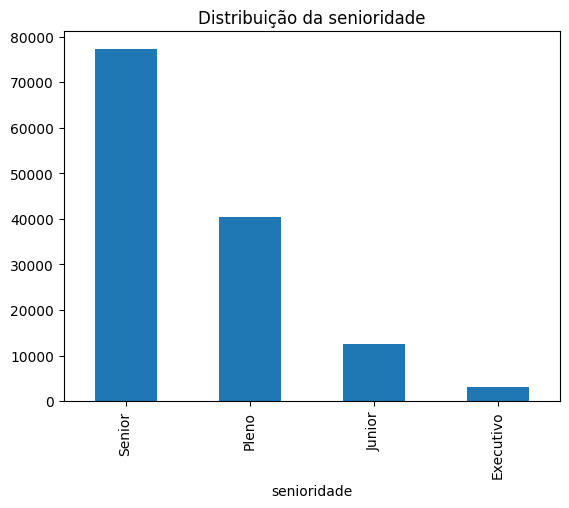

In [ ]:
df_dadoslimpos['senioridade'].value_counts().plot(kind='bar', title='Distribuição da senioridade') #Criando um Gráfico para a tabela acima e definindo informações para ele.

In [ ]:
import seaborn as sns #Importando biblioteca SEABORN

<Axes: xlabel='senioridade', ylabel='usd'>

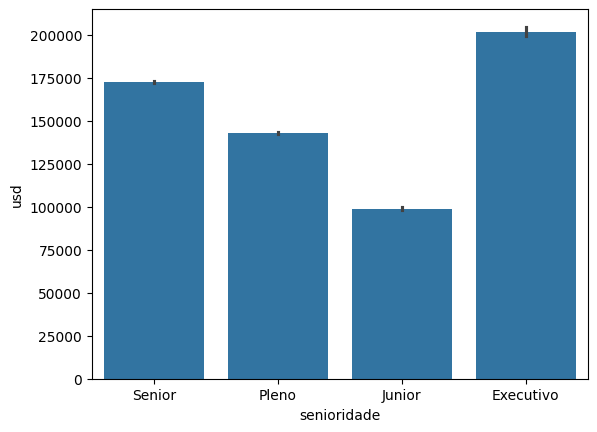

In [ ]:
sns.barplot(data=df_dadoslimpos, x='senioridade', y='usd') #Alterando nomes do conteudo do gráfico.

In [ ]:
import matplotlib.pyplot as plt #Importando biblioteca MATPLOTLIB.PYPLOT.

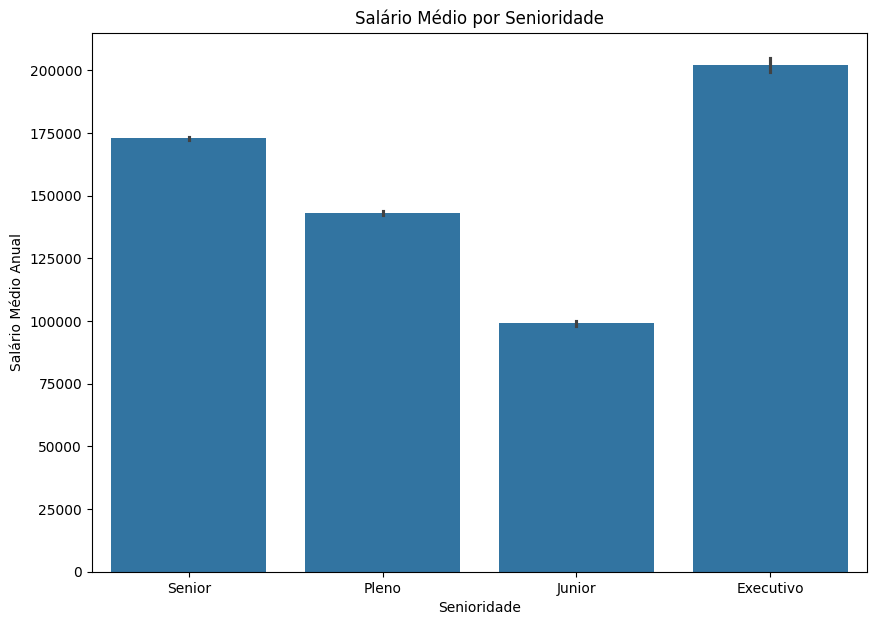

In [ ]:
plt.figure(figsize=(10, 7)) #Definindo o tamanho do gráfico.
sns.barplot(data=df_dadoslimpos, x='senioridade', y='usd') #Definindo o que eu quero no gráfico.
plt.title('Salário Médio por Senioridade') #Definindo um Título para o gráfico.
plt.xlabel('Senioridade') #Definindo nome para o eixo X.
plt.ylabel('Salário Médio Anual') #Defininfo nome para o eixo Y.
plt.show() #Start no gráfico.

In [ ]:
df_dadoslimpos.groupby('senioridade')['usd'].mean().sort_values(ascending=False) #Calculando média salarial por Senioridade e organizando em ordem do maior para menor.

,usd
senioridade,
Executivo,202027.667813
Senior,172850.838301
Pleno,143044.845979
Junior,99034.963267


In [ ]:
ordem = df_dadoslimpos.groupby('senioridade')['usd'].mean().sort_values(ascending=True).index #Armazenando em uma variável. Obs: ascending=False -> Maior para Menor
                                                                                                                                 #ascending=True -> Menor para Maior
ordem

Index(['Junior', 'Pleno', 'Senior', 'Executivo'], dtype='object', name='senioridade')

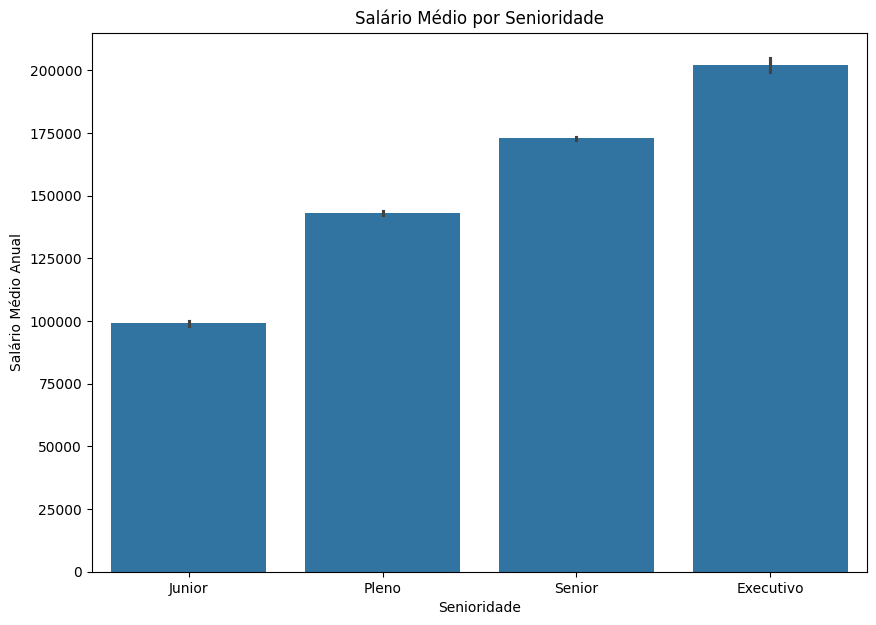

In [ ]:
plt.figure(figsize=(10, 7)) #Definindo o tamanho do gráfico.
#Definindo o que eu quero no gráfico.
sns.barplot(data=df_dadoslimpos, x='senioridade', y='usd', order=ordem ) #Adicionei order=ordem para aplicar no gráfico a ordem de maior para menor)
plt.title('Salário Médio por Senioridade') #Definindo um Título para o gráfico.
plt.xlabel('Senioridade') #Definindo nome para o eixo X.
plt.ylabel('Salário Médio Anual') #Defininfo nome para o eixo Y.
plt.show() #Start no gráfico.

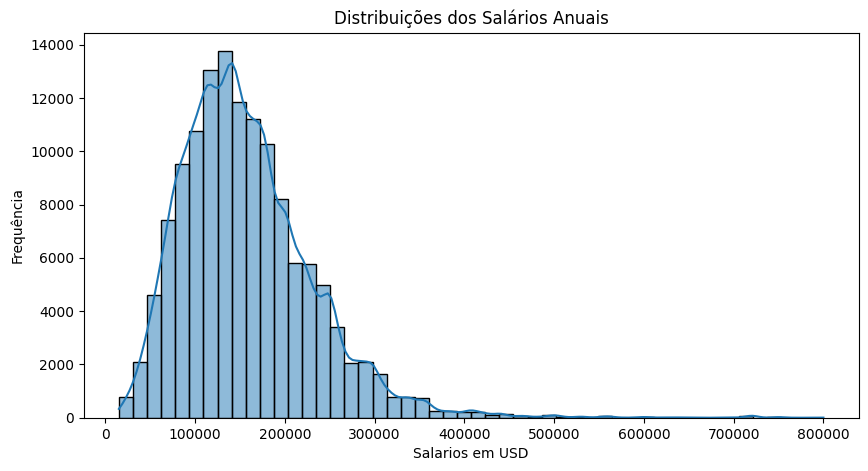

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df_dadoslimpos['usd'], bins=50, kde=True) # (Bins -> Largura das barras Azuis.) -- ( kde -> É a linha que passa por cima das estatísticas. False -> remove.)
#Definindo o que eu quero no gráfico.
plt.title('Distribuições dos Salários Anuais') #Definindo um Título para o gráfico.
plt.xlabel('Salarios em USD') #Definindo nome para o eixo X.
plt.ylabel('Frequência') #Defininfo nome para o eixo Y.
plt.show() #Start no gráfico.


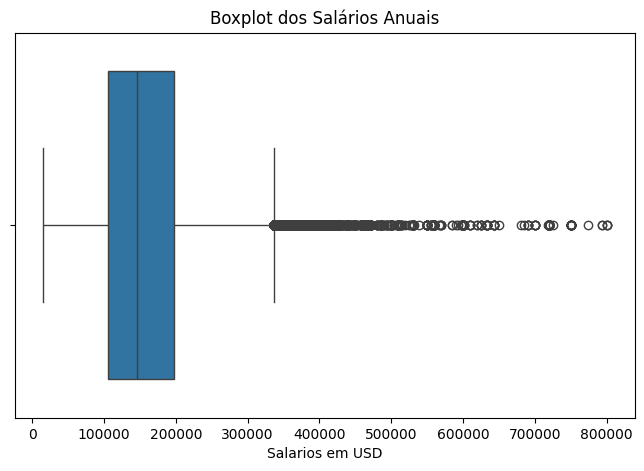

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_dadoslimpos['usd'])
plt.title('Boxplot dos Salários Anuais')
plt.xlabel('Salarios em USD')
plt.show()


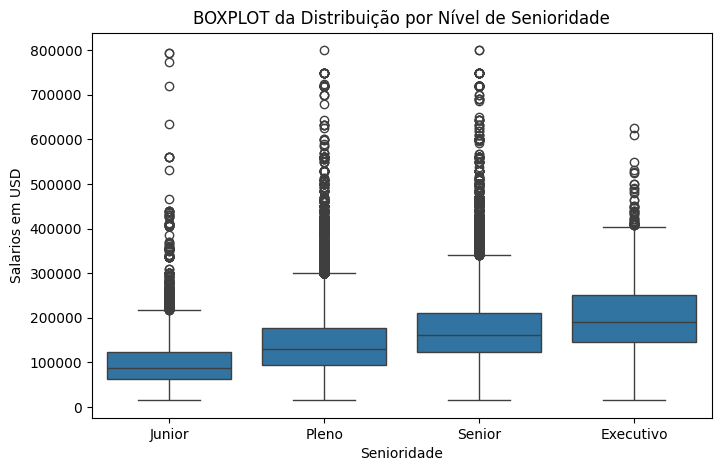

In [ ]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']
plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_dadoslimpos, order=ordem)
plt.title('BOXPLOT da Distribuição por Nível de Senioridade') #Definindo um Título para o gráfico.
plt.xlabel('Senioridade') #Definindo nome para o eixo X.
plt.ylabel('Salarios em USD')
plt.show() #Start no gráfico.

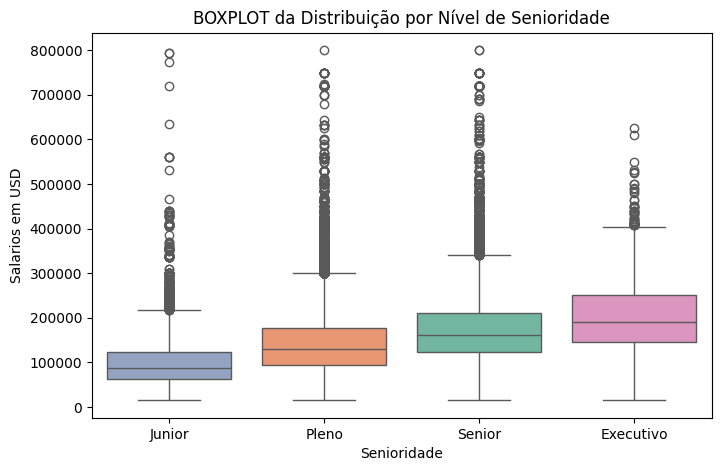

In [ ]:
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']
plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_dadoslimpos, order=ordem, palette='Set2', hue='senioridade')
plt.title('BOXPLOT da Distribuição por Nível de Senioridade') #Definindo um Título para o gráfico.
plt.xlabel('Senioridade') #Definindo nome para o eixo X.
plt.ylabel('Salarios em USD')
plt.show() #Start no gráfico.

In [ ]:
import plotly.express as px

In [ ]:
media_salario_por_senioridade = df_dadoslimpos.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

fig = px.bar(
    x=media_salario_por_senioridade.index,
    y=media_salario_por_senioridade.values,
    labels={'x': 'Senioridade', 'y': 'Salário Médio Anual (USD)'},
    title='Salário Médio Anual por Senioridade',
    color=media_salario_por_senioridade.index,
    color_discrete_sequence=px.colors.qualitative.Plotly
)

fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray': media_salario_por_senioridade.index})
fig.show()

In [ ]:

remoto_contagem = df_dadoslimpos['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']
fig = px.pie(remoto_contagem,
             names= 'tipo_trabalho',
             values= 'quantidade',
             title = 'Proporção dos Tipos de Trabalho',
             hole=0.5,
             )
fig.update_traces(textinfo='percent+label')
fig.show()


In [ ]:
#Desafio do Professor!! Gerei com IA conforme ele pediu na aula.
df_cientista_dados = df_dadoslimpos[df_dadoslimpos['cargo'] == 'Data Scientist']

media_salario_por_pais = df_cientista_dados.groupby('empresa')['usd'].mean().sort_values(ascending=False)

# Selecionar os 10 principais países
paises_principais = media_salario_por_pais.head(10).index.tolist()

# Adicionar o Brasil à lista se não estiver presente
if 'BR' not in paises_principais:
    paises_principais.append('BR')

# Filtrar os dados para incluir apenas os países selecionados
media_salario_por_paises_selecionados = media_salario_por_pais.loc[paises_principais].sort_values(ascending=False)

# Mapeamento de códigos de país para nomes completos
country_names = {
    'US': 'Estados Unidos',
    'SG': 'Singapura',
    'BG': 'Bulgária',
    'CH': 'Suíça',
    'EG': 'Egito',
    'CA': 'Canadá',
    'MX': 'México',
    'NZ': 'Nova Zelândia',
    'JP': 'Japão',
    'IL': 'Israel',
    'AU': 'Austrália',
    'CZ': 'República Tcheca',
    'IT': 'Itália',
    'DZ': 'Argélia',
    'KR': 'Coreia do Sul',
    'RU': 'Rússia',
    'FR': 'França',
    'DE': 'Alemanha',
    'IE': 'Irlanda',
    'PT': 'Portugal',
    'NO': 'Noruega',
    'SE': 'Suécia',
    'GB': 'Reino Unido',
    'BR': 'Brasil',
    'ES': 'Espanha',
    'LV': 'Letônia',
    'PL': 'Polônia',
    'GR': 'Grécia',
    'TR': 'Turquia',
    'CO': 'Colômbia',
    'AS': 'Samoa Americana',
    'AR': 'Argentina',
    'VN': 'Vietnã',
    'AT': 'Áustria',
    'BE': 'Bélgica',
    'PK': 'Paquistão',
    'HR': 'Croácia',
    'CL': 'Chile',
    'SI': 'Eslovênia',
    'MD': 'Moldávia',
    'NG': 'Nigéria',
    'PH': 'Filipinas',
    'FI': 'Finlândia',
    'UA': 'Ucrânia',
    'HU': 'Hungria',
    'RO': 'Romênia',
    'AE': 'Emirados Árabes Unidos',
    'LT': 'Lituânia',
    'BA': 'Bósnia e Herzegovina',
    'LU': 'Luxemburgo',
    'PR': 'Porto Rico',
    'MT': 'Malta',
    'KE': 'Quênia',
    'DK': 'Dinamarca',
    'IR': 'Irã',
    'GH': 'Gana',
    'MY': 'Malásia',
    'HN': 'Honduras',
    'CY': 'Chipre',
    'EE': 'Estônia',
    'AM': 'Armênia',
    'MA': 'Marrocos',
    'BO': 'Bolívia',
    'TH': 'Tailândia',
    'KW': 'Kuwait',
    'CR': 'Costa Rica',
    'MK': 'Macedônia do Norte',
    'DO': 'República Dominicana',
    'HK': 'Hong Kong',
    'ID': 'Indonésia',
    'IQ': 'Iraque',
    'AD': 'Andorra',
    'RS': 'Sérvia',
    'JE': 'Jersey',
    'UZ': 'Uzbequistão',
    'SK': 'Eslováquia',
    'LB': 'Líbano',
    'PE': 'Peru',
    'CM': 'Camarões',
    'JO': 'Jordânia',
    'MC': 'Mônaco',
    'QA': 'Catar',
    'CF': 'República Centro-Africana',
    'AO': 'Angola',
    'EC': 'Equador',
    'OM': 'Omã',
    'MM': 'Mianmar',
    'GE': 'Geórgia',
    'KZ': 'Cazaquistão',
    'CU': 'Cuba',
    'KG': 'Quirguistão',
    'AL': 'Albânia',
    'TZ': 'Tanzânia',
    'PY': 'Paraguai',
    'JM': 'Jamaica',
    'NP': 'Nepal',
    'IS': 'Islândia',
    'BW': 'Botsuana',
    'TN': 'Tunísia',
    'GG': 'Guernsey',
    'VE': 'Venezuela'
}

# Substituir as siglas pelos nomes completos dos países
media_salario_por_paises_selecionados_nomes = media_salario_por_paises_selecionados.rename(index=country_names)

fig = px.bar(
    x=media_salario_por_paises_selecionados_nomes.index,
    y=media_salario_por_paises_selecionados_nomes.values,
    labels={'x': 'País da Empresa', 'y': 'Salário Médio Anual (USD)'},
    title='Salário Médio Anual para Cientistas de Dados nos Principais Países (incluindo Brasil)',
    color=media_salario_por_paises_selecionados_nomes.index,
    color_discrete_sequence=px.colors.qualitative.Plotly
)

fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

In [45]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [53]:
pip install pycountry

In [51]:
import pycountry

#Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
  try:
    return pycountry.countries.get(alpha_2=code).alpha_3
  except:
    return None

#Criar nova coluna com código ISO-3
df_dadoslimpos['residencia_iso3'] = df_dadoslimpos['residencia'].apply(iso2_to_iso3)

#Calcular Média Salarial por país (ISO-3)
df_ds = df_dadoslimpos[df_dadoslimpos['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

#Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations = 'residencia_iso3',
                    color = 'usd',
                    color_continuous_scale = 'rdylgn',
                    title = 'Média Salárial por País (Cientísta de Dados)',
                    labels = {'usd': 'Salário Médio (USD)', 'residencia_iso3': 'País'})
fig.show()

/tmp/ipython-input-3412029099.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [52]:
df_dadoslimpos.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,residencia_iso3
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio,USA
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio,USA
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio,AUS
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio,AUS
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio,USA


In [54]:
df_dadoslimpos.to_csv('df_dadoslimpos.csv', index=False)

# Nova secção

Aula 4 - Criando Dashboard Interativo.